In [1]:
import math
import numpy as np
import pandas as pd
from numba import njit
from numba import jit
!python -m pip install yfinance
import yfinance as yf
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
plot_width = 15
plot_length = 3
lookback = 5


In [3]:
extract_obj = yf.Ticker("AAPL")
data = extract_obj.history(period="1y")
data['Typical Price'] = ((data['High'] + data['Low'] + data['Close']) / 3).round(2)
data = data.iloc[-50:]
price_list = np.array(data['Typical Price'])

In [4]:
#price_list - numpy array list
#lookback - integer
def sma(price_array, lookback):
    out_array = np.array([None for i in range(lookback)])
    for i in range(price_array.size - lookback):
        out_val = (np.sum(price_array[i:i+lookback])/lookback)
        out_array = np.append(out_array,out_val)
    return out_array


In [5]:
start = time.time()
x1 = sma(price_list,lookback)
end = time.time()
print(x1)
function_time = end - start

[None None None None None 122.744 122.726 122.66599999999998
 122.09400000000001 121.43400000000001 121.248 121.282 121.09399999999998
 120.446 120.69800000000001 121.258 122.15799999999999 123.10999999999999
 124.55999999999999 126.054 127.774 129.078 130.544 131.724
 132.64600000000002 133.08599999999996 133.67999999999998 133.642 133.632
 133.25799999999998 133.224 133.204 133.434 133.64399999999998 134.01
 133.644 133.318 132.128 131.118 130.026 129.728 128.756 128.06
 126.98000000000002 126.276 125.624 125.30199999999999 125.41399999999999
 125.602 125.918]


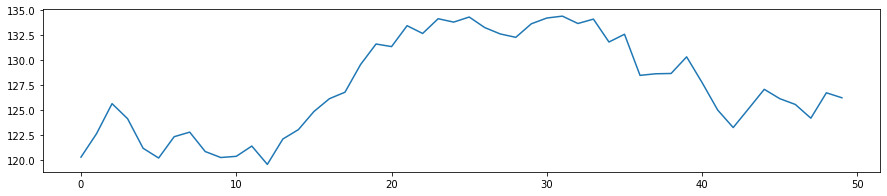

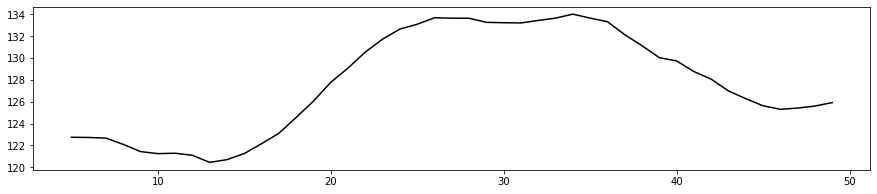

In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x1.size), x1, color = 'black')
plt.show()

In [7]:
def bol_sma_gen(price_array, lookback, multiplier = 1):
    up_bound_array = np.array([None for i in range(price_array.size)])
    down_bound_array = np.array([None for i in range(price_array.size)])
    
    def sma(price_array, lookback):
        out_array = np.array([None for i in range(lookback)])
        for i in range(price_array.size - lookback):
            out_val = (np.sum(price_array[i:i+lookback])/lookback)
            out_array = np.append(out_array,out_val)
        return out_array
    
    sma_arr = sma(price_array, lookback)
    for i in range(price_array.size - lookback):
        std = np.std(price_array[i:i+lookback])
        up_bound_array[i+lookback] = sma_arr[i+lookback] + (std*multiplier)
        down_bound_array[i+lookback] = sma_arr[i+lookback] - (std*multiplier)

    return up_bound_array,sma_arr,down_bound_array

In [8]:
start = time.time()
up_bol, sma, down_bol = bol_sma_gen(price_array = price_list, lookback = lookback, multiplier = 1)
end = time.time()
print(up_bol)
print(sma)
print(down_bol)
indic_generation_time = (end-start)

[None None None None None 126.63767898009068 126.66618476724126
 126.62114045262616 124.80703814938163 123.35381665791296
 123.41056884283485 123.37944225188681 122.9470234752965 121.6771035699729
 122.50507055755995 123.72718286078613 125.67584934299352
 127.6705438272206 128.13694842009218 130.38374086984427
 132.69290394295317 133.62667717034304 135.0590344406217 134.3768053075942
 134.7742706594792 135.08109799258077 134.85316665482785 134.8541650052695
 134.87646936482986 134.75361492370192 134.67493624946098
 134.5954941609651 135.13273364598456 135.1352330468441 134.62096644752393
 135.54134973054522 135.26688275686354 136.13548100432178
 135.58142290176497 133.61256604567657 132.89521707497292
 130.45685155142945 131.565949229524 132.0903502815365 131.2398791282625
 128.8408705289458 127.86756894274934 127.96239871291758
 127.54108844563626 127.95872144105951]
[None None None None None 122.744 122.726 122.66599999999998
 122.09400000000001 121.43400000000001 121.248 121.282 121

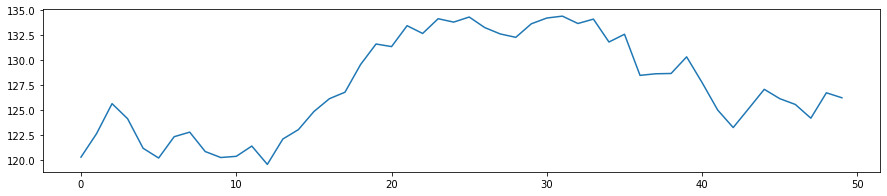

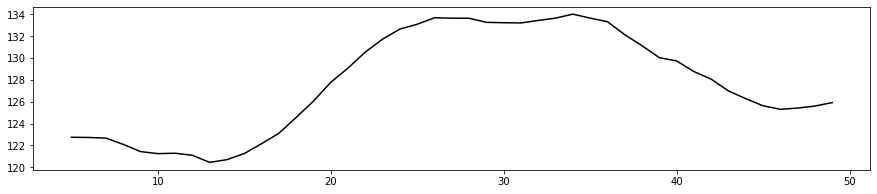

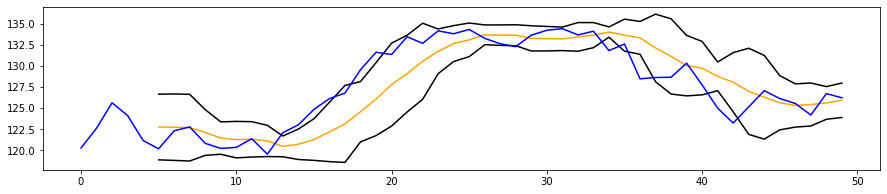

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(up_bol.size), up_bol, color = 'black')
plt.plot(np.arange(sma.size), sma, color = 'orange')
plt.plot(np.arange(down_bol.size), down_bol, color = 'black')
plt.plot(np.arange(price_list.size), price_list, color = 'blue')
plt.show()

In [10]:
def current_bias(price_array, up_bound_array, down_bound_array):
    bias = 0
    bias_list = []
    for i,j,k in zip(price_array,up_bound_array, down_bound_array):
        try: 
            if(i >= j):
                bias = 100
            elif(i <= k):
                bias = -100
            elif(i > k and i < j):
                bias = 0
        except TypeError:
            bias = 0
        bias_list.append(bias)
    bias_array = np.array(bias_list)
    return bias_array

In [11]:
start = time.time()
bias_array = current_bias(price_array = price_list, up_bound_array = up_bol, down_bound_array = down_bol)
end = time.time()
bias_time = end - start
print(bias_array)

[   0    0    0    0    0    0    0    0    0    0    0    0    0  100
  100  100  100    0  100  100    0    0    0    0    0    0    0    0
 -100    0    0    0    0    0 -100    0 -100    0    0    0    0 -100
 -100    0    0    0    0    0    0    0]


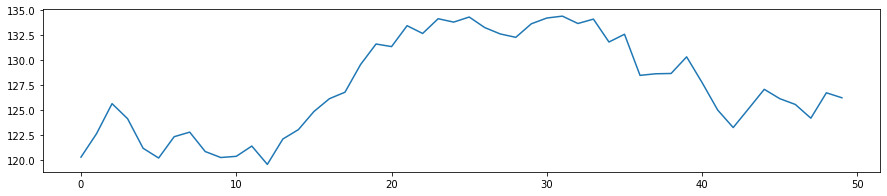

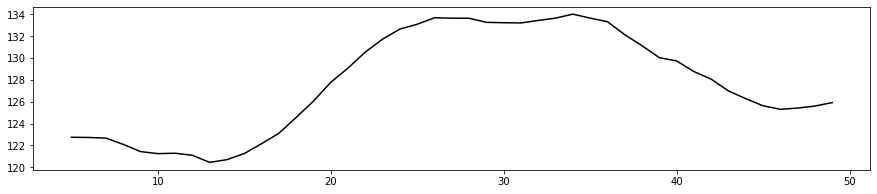

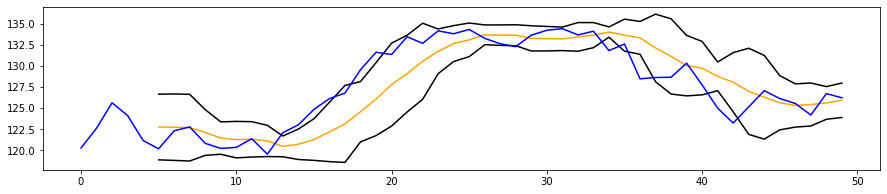

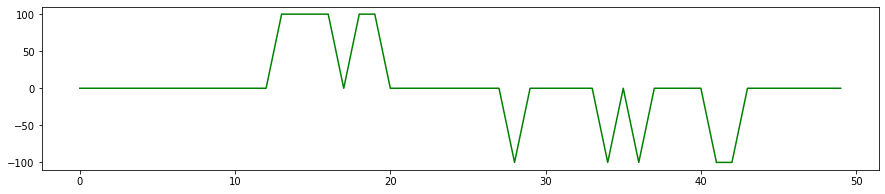

In [12]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(up_bol.size), up_bol, color = 'black')
plt.plot(np.arange(sma.size), sma, color = 'orange')
plt.plot(np.arange(down_bol.size), down_bol, color = 'black')
plt.plot(np.arange(price_list.size), price_list, color = 'blue')

figure(figsize=(plot_width, plot_length))
ax4 = plt.subplot()
plt.plot(np.arange(bias_array.size), bias_array, color = 'green')

plt.show()



In [13]:
def efficacy_generator (price_array, bias_array, stop_loss_percent = 0.3):
    long_book = [0 for i in range(price_array.size)]
    short_book = [0 for i in range(price_array.size)]
    long_pos = []
    short_pos = []
    long_positions = []
    short_positions = []
    long_cash = 0
    short_cash = 0
    stop_loss_flag = False
    short_position_flag = False
    long_position_flag = False
    sub_stop = (max(price_array) - min(price_array))*stop_loss_percent
    
    ctr = 0
    for i,j in zip(price_array, bias_array):
        if (stop_loss_flag):
            if(j == 100 or j == -100):
                stop_loss_flag = False                 
        elif (stop_loss_flag == False  and short_position_flag == False and long_position_flag == False):
            if(j == 100):
                long_position_flag = True
                long_pos.append(i)
                long_book[ctr] = i
            elif(j == -100):
                short_position_flag = True
                short_pos.append(i)
                short_book[ctr] = i
        elif(stop_loss_flag == False  and short_position_flag == True):
            short_pos.append(i)
            short_book[ctr] = i
            if (i > (min(short_pos) + sub_stop)):
                short_position_flag = False
                stop_loss_flag = True
                short_positions.append(short_pos)
                short_pos = []
            elif(j == 100):
                short_position_flag = False
                long_position_flag = True
                short_positions.append(short_pos)
                short_pos = []
            elif(j == 0):
                short_position_flag = False
                short_positions.append(short_pos)
                short_pos = []
        elif(stop_loss_flag == False and long_position_flag == True):
            long_pos.append(i)
            long_book[ctr] = i
            if (i < (max(long_pos) - sub_stop)):
                long_position_flag = False
                stop_loss_flag = True
                long_positions.append(long_pos)
                long_pos = []
            elif (j == 0):
                long_position_flag = False
                long_positions.append(long_pos)
                long_pos = []
            elif(j == -100):
                long_position_flag = False
                short_position_flag = True
                long_positions.append(long_pos)
                long_pos = []
                
        ctr += 1
        
    if (long_pos != []):
        long_positions.append(long_pos)
    if (short_pos != []):
        short_positions.append(short_pos)
    
    for i in long_positions:
        long_cash += (i[-1] - i[0])
    for i in short_positions:
        short_cash += (i[0] - i[-1])
    
    out = (long_cash+short_cash)/sub_stop
    print(out)
    return long_book,short_book

In [14]:
start = time.time()
test = efficacy_generator(price_array = price_list, bias_array = bias_array)
end = time.time()
efficacy_time = end - start
print(test)

0.9088873964629575
([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 122.07, 123.01, 124.83, 126.12, 126.77, 129.54, 131.61, 131.35, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 132.28, 133.64, 0, 0, 0, 0, 131.81, 132.59, 128.46, 128.62, 0, 0, 0, 124.98, 123.22, 125.13, 0, 0, 0, 0, 0, 0])


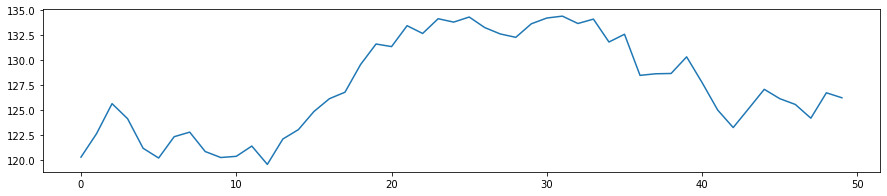

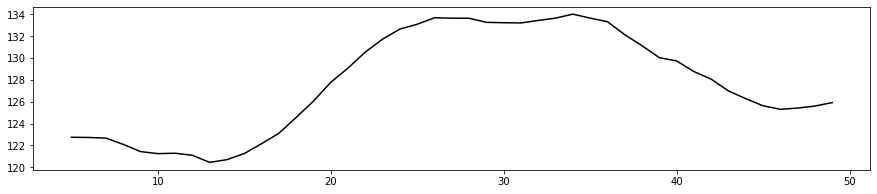

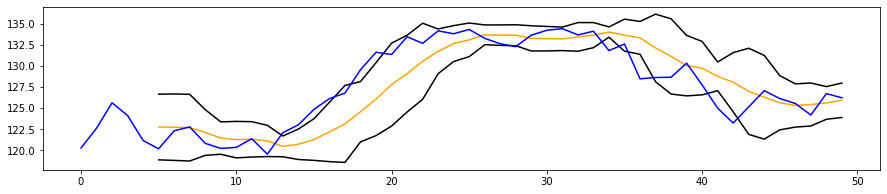

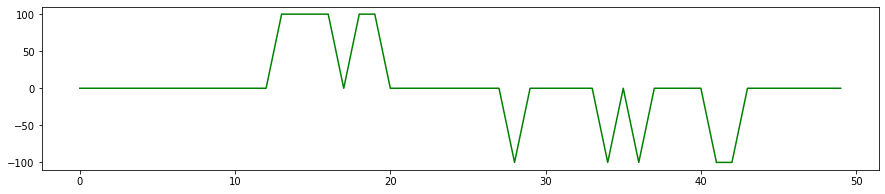

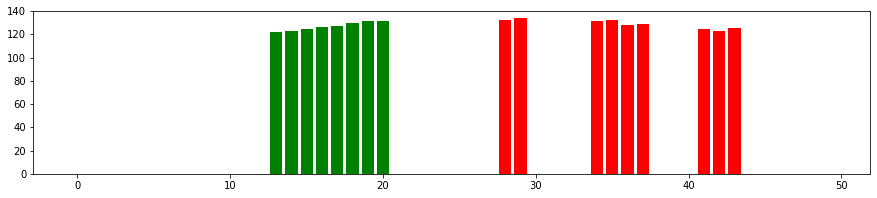

In [15]:
figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(up_bol.size), up_bol, color = 'black')
plt.plot(np.arange(sma.size), sma, color = 'orange')
plt.plot(np.arange(down_bol.size), down_bol, color = 'black')
plt.plot(np.arange(price_list.size), price_list, color = 'blue')

figure(figsize=(plot_width, plot_length))
ax4 = plt.subplot()
plt.plot(np.arange(bias_array.size), bias_array, color = 'green')

figure(figsize=(plot_width, plot_length))
ax5 = plt.subplot()
plt.bar(np.arange(bias_array.size), test[0], color = 'green')
plt.bar(np.arange(bias_array.size), test[1], color = 'red')

plt.show()

In [18]:
print(
    "Diagnostics \n" +
    "Function Load Time: " + str(function_time) + "\n" + 
    "Indicator Generations Time: " + str(indic_generation_time) + "\n" + 
    "Bias Load Time: " + str(bias_time) + "\n" + 
    "Efficacy Value Load time: " + str(efficacy_time) + "\n"
    "Total Time: " + str(function_time+indic_generation_time+bias_time+efficacy_time)
    )

Diagnostics 
Function Load Time: 0.003993988037109375
Indicator Generations Time: 0.013995647430419922
Bias Load Time: 0.0
Efficacy Value Load time: 0.001995563507080078
Total Time: 0.019985198974609375
